In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# OS: Conectar el data set

In [26]:
# Tomar el dataset
import os
current_dir = os.getcwd()
datasets_path = os.path.join(os.path.dirname(current_dir), "Datasets")
print(f"Datasets folder path: {datasets_path}")


Datasets folder path: c:\Users\fbien.DESKTOP-6FMEAR7\Desktop\CV_Medical\cv_medical\Datasets


In [27]:
# Lista de nombres

import re
filenames = os.listdir(datasets_path) 
txt_pattern = r".+\.txt$"  # Matches any string followed by ".txt" at the end

# f[:-4] no incluye el ".txt", los ultimos 4 caracteres
files = [f[:-4] for f in filenames if re.match(txt_pattern, f)]

print(f"5 text files:")
for i in range(5):
    print(files[i])



5 text files:
24050201
24050202
24050203
24050204
24050205


# Usar una file

Tenemos
- `datasets_path`
- `files`

Se han de utilizar para buscar el archivo tipo imagen,
el cual en el caso de ser una versión recortada tendrá el mismo nombré pero con una "x" al final seguido de su extensión

True

In [41]:
def find_matching_file(datasets_path, files):
    """
    Searches for a file in the specified directory that has the same name as a file in the
    provided list, but with an "x" appended before an unknown extension.
    Args:
        datasets_path: The absolute path to the directory containing the files.
        files: A list of filenames (without extensions) to search for.
    Returns:
        A list of matching filenames (including extensions) found in the directory,
        or an empty list if no matches are found.
    """

    matching_files = []

    if type(files) != list:
        files = [files] # little fix to get back list for 1-inputs too

    for filename in files:
        # Construct the matching pattern with a capture group for the extension
        pattern = (
            f"{filename}x\.([^\.]+)"  # Matches filename + 'x' + '.' + any characters
        )

        for entry in os.scandir(datasets_path):
            if entry.is_file() and re.match(pattern, entry.name):
                # Extract the extension from the matched filename
                extension = re.match(pattern, entry.name).group(1)
                matching_files.append(
                    f"{filename}x.{extension}"
                )  # Reconstruct full name with extension
                break  # Stop searching once a match is found for the current filename

    return matching_files

matching_files = find_matching_file(datasets_path, files)

if matching_files:
    print("Matching files found:")
    for file in matching_files:
        print(file)
else:
    print("No matching files found.")

Matching files found:
24050201x.jpeg
24050202x.jpeg
24050203x.jpeg
24050204x.jpeg
24050205x.jpeg
24050301x.png
24050302x.png
24050303x.png
24050304x.png
24050305x.png
24050306x.png
24050307x.png
24050308x.png
24050309x.png
24050310x.png


In [50]:
img_path = find_matching_file(datasets_path, files[0])[0]
img_path = os.path.join(datasets_path, img_path)
print(img_path)

c:\Users\fbien.DESKTOP-6FMEAR7\Desktop\CV_Medical\cv_medical\Datasets\24050201x.jpeg


Comenzando a utilizar las imagenes en cv2

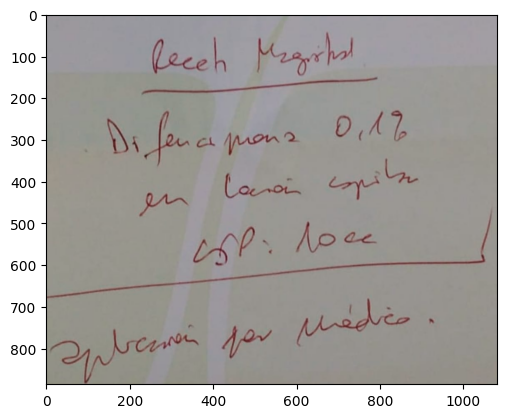

In [53]:
img = cv2.imread(img_path)
h,w,c = img.shape

plt.imshow(img)